# Regularization

In [61]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

from sklearn.preprocessing import StandardScaler

area = np.array([
    68.9, 40.5, 33.42, 73, 74.11, 76, 61.51, 52, 70, 76.6, 20, 32, 58, 45, 27,
    33
], np.float64)
price = np.array([
    720, 520, 420, 955, 785, 897, 830, 670, 900, 885, 480, 620, 860, 550, 290,
    320
], np.float64)

tf.reset_default_graph()
K.clear_session()
tf.set_random_seed(42)

areascaler = StandardScaler()
pricescaler = StandardScaler()

area_scaled = areascaler.fit_transform(area.reshape(-1, 1))
price_scaled = pricescaler.fit_transform(price.reshape(-1, 1))


def train_network(l2_reg):
    model = Sequential([
        Dense(
            50,
            input_shape=((1, )),
            kernel_regularizer=regularizers.l2(l2_reg),
            activation='tanh'),
        Dense(1, activation='linear'),
    ])

    model.compile(optimizer=optimizers.Adam(lr=0.1), loss='mse')
    model.fit(area_scaled, price_scaled, epochs=3000, verbose=0)
    return model


model1 = train_network(0)
model2 = train_network(0.05)

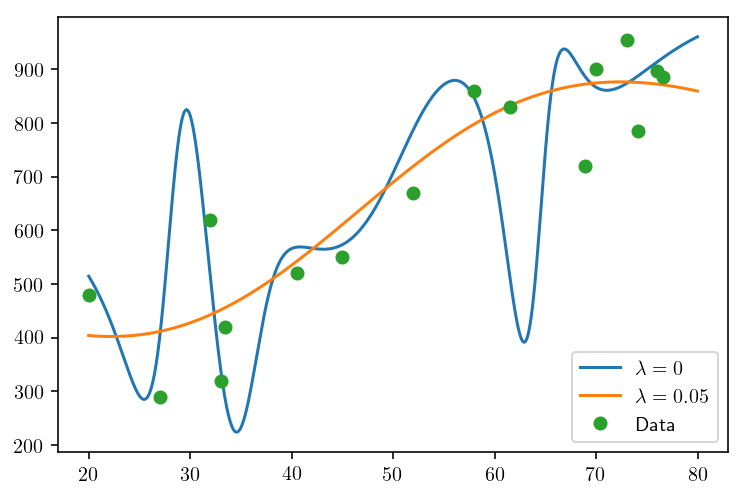

In [62]:
xscaler = StandardScaler()

x = np.arange(20, 80, 0.01)
x_scaled = xscaler.fit_transform(x.reshape(-1, 1))
y1_scaled = model1.predict(x_scaled)
y2_scaled = model2.predict(x_scaled)

y1 = pricescaler.inverse_transform(y1_scaled)
y2 = pricescaler.inverse_transform(y2_scaled)

plt.rc('text', usetex=True)
plt.plot(x, y1, label="$\\lambda=0$")
plt.plot(x, y2, label="$\\lambda=0.05$")
plt.plot(area, price, linestyle='none', marker="o", label="Data")
plt.legend()
plt.show()